# Schmidt-Appleman criterion

Model areas of the atmosphere that satisfy the Schmidt-Appleman criterion (SAC).

### Met Data

- Requires account with [Copernicus Data Portal](https://cds.climate.copernicus.eu/cdsapp#!/home) and  local `~/.cdsapirc file` with credentials.

In [1]:
import pandas as pd

from pycontrails import Flight
from pycontrails.datalib.ecmwf import ERA5
from pycontrails.models.sac import SAC

# ignore pycontrails warning about ECMWF humidity scaling
import warnings

warnings.filterwarnings(message=".*humidity scaling.*", action="ignore")

## Inputs

In [2]:
time = ("2022-03-01 00:00:00", "2022-03-01 03:00:00")
pressure_levels = [300, 250, 200]
variables = ["t", "q"]  # only temperature and humidity are needed for SAC

## Get Data

In [3]:
era5 = ERA5(time=time, variables=variables, pressure_levels=pressure_levels)
met = era5.open_metdataset()

## Calculations

In [4]:
# evaluate SAC on met grid
sac = SAC(met=met).eval()  # returns a MetDataArray

# edge detection algorithm using differentiation to reduce the areas to lines
sac_edges = sac.find_edges()

## Figures

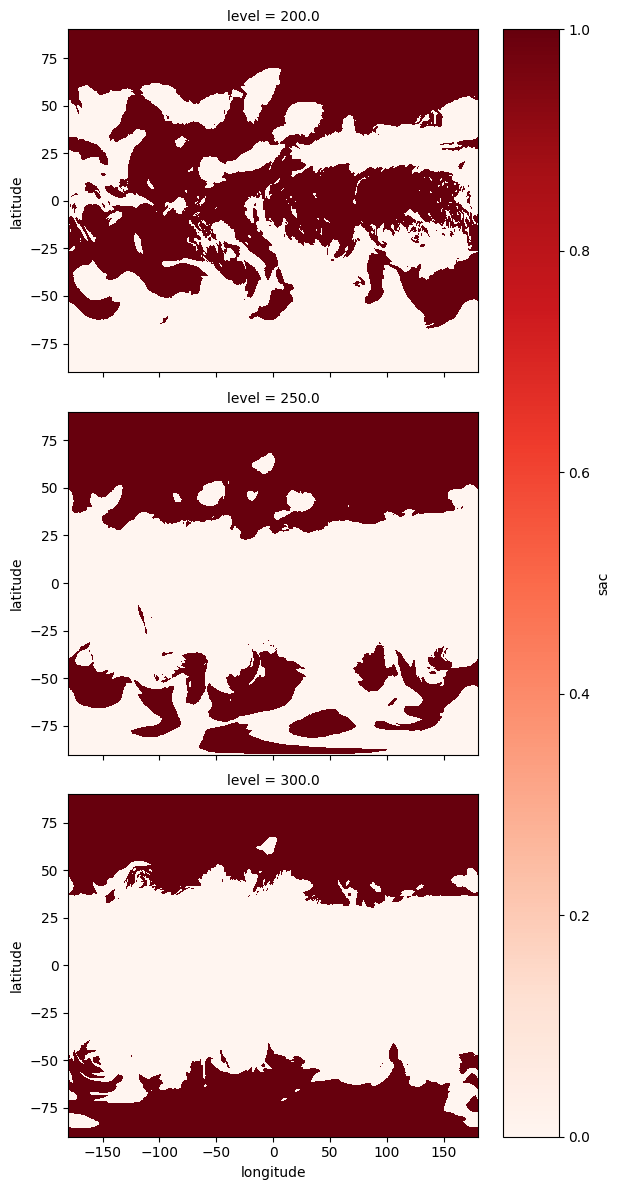

In [5]:
# plot sac regions for each pressure level
sac.data.isel(time=0).plot(x="longitude", y="latitude", row="level", cmap="Reds", figsize=(6, 12));

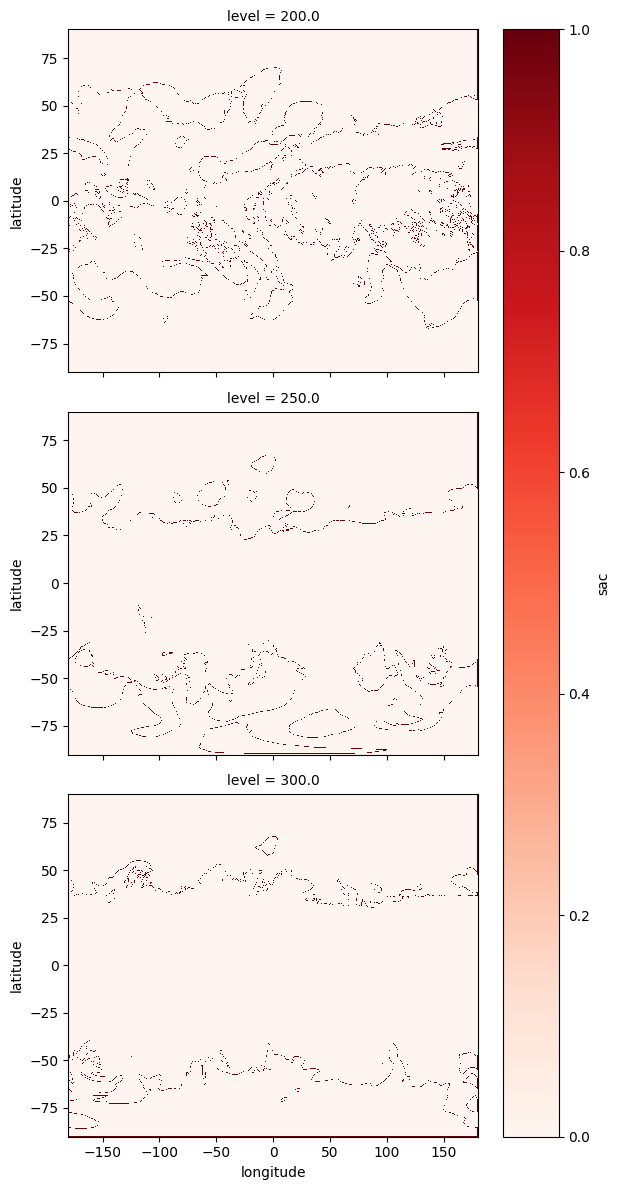

In [6]:
# plot issr edges for each pressure level
sac_edges.data.isel(time=0).plot(
    x="longitude", y="latitude", row="level", cmap="Reds", figsize=(6, 12)
);

## Interpolate

Run model along a flight path

In [7]:
# Load flight
df = pd.read_csv("flight.csv", parse_dates=["time"])
fl = Flight(data=df, flight_id="acdd1b", callsign="AAL1158")

In [8]:
# run model for across full input domain
# outputs global ice super-saturated regions as 1, all other regions as 0
# np.nan is returned outside of the met domain
fl_out = SAC(met).eval(source=fl)
fl_out["sac"]

array([nan, nan,  1., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan])

In [9]:
# Get the length of the Flight in the SAC region
fl_out.length_met("sac")

1390898.4268105943

In [10]:
# The SAC is sensitive to the engine efficiency of the aircraft.
# As this value decreases, fewer waypoints satisfy the SAC.
fl_out = SAC(met, engine_efficiency=0.0).eval(source=fl)
fl_out["sac"]

array([nan, nan,  0., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        0.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan])